# Segment Anything

Segment AnythingはMetaが発表した大量の画像データで学習したセグメンテーションモデルです．zero-shot-segmentationが可能であり学習データにない画像にも適用することができます．
- Github：https://github.com/facebookresearch/segment-anything

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/cv/semantic_segmentation/segment_anything.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install pycocotools onnxruntime onnx supervision

In [2]:
# モデルのダウンロード
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-10-10 16:28:19--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.70, 13.227.219.10, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   249MB/s    in 11s     

2023-10-10 16:28:31 (221 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [15]:
import numpy
import torch
import matplotlib.pyplot as plt
import cv2
import supervision as sv

from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator

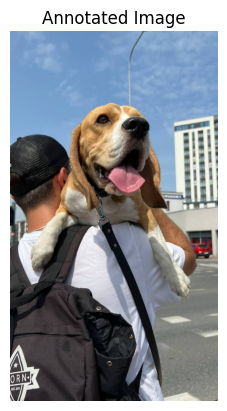

In [17]:
IMAGE_PATH = "/content/dog.jpeg"

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Annotated Image")
plt.axis("off")  # 軸をオフにして、画像だけを表示します。
plt.show()

### Segment Anything Model
以下のリンクからいくつかのモデルを選ぶことができます．
* https://github.com/facebookresearch/segment-anything#model-checkpoints
- SAMのパラメータについて
    - https://www.chowagiken.co.jp/blog/sam_parameter

In [27]:
sam = sam_model_registry["vit_h"](checkpoint="/content/sam_vit_h_4b8939.pth")

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sam.to(device=DEVICE)

# パラメータの設定
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side = 32,
    pred_iou_thresh = 0.980,
    stability_score_thresh = 0.96,
    crop_n_layers = 1,
    crop_n_points_downscale_factor = 2,
    min_mask_region_area = 100
)

In [28]:
result = mask_generator.generate(image_rgb)
mask_annotator = sv.MaskAnnotator(color_map = "index")
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)

### 出力結果
- segmentation:(W, H)の形状を持つマスクでbool型
- area:マスクのピクセルの面積
- bbox:xywhフォーマットのマスクのボックス
- predicted_iou:マスクの品質に関するモデル自身の予測値
- point_coords:このマスクを生成したサンプリングされた入力点
- stability_score:マスクの品質に関する追加的な指標
- crop_box:このマスクを生成するために使用された画像のクロップ（xywh形式）

In [ ]:
result

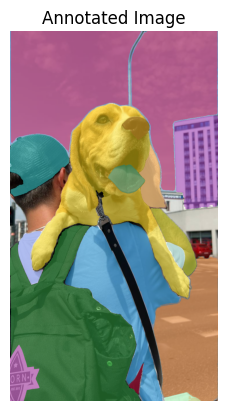

In [29]:
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

plt.imshow(annotated_image_rgb)
plt.title("Annotated Image")
plt.axis("off")
plt.show()

### 指定した箇所だけのSemantic Segmentation

In [ ]:
from segment_anything import SamPredictor

In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
mask_predictor.set_image(image_rgb)

box = np.array([70, 247, 626, 926])
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

masks

In [25]:
mask_predictor.set_image(image_rgb)

box = np.array([70, 247, 626, 926])
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
predictor = SamPredictor(sam)